time steps <class 'netCDF4._netCDF4.Variable'>
int64 time(time)
    standard_name: time
    long_name: time
    axis: T
    units: hours since 2013-12-06 03:00:00
    calendar: proleptic_gregorian
unlimited dimensions: 
current shape = (54,)
filling on, default _FillValue of -9223372036854775806 used
No.of timesteps 54
[datetime.datetime(2013, 12, 6, 3, 0), datetime.datetime(2013, 12, 6, 6, 0), datetime.datetime(2013, 12, 6, 9, 0), datetime.datetime(2013, 12, 6, 12, 0), datetime.datetime(2013, 12, 6, 15, 0), datetime.datetime(2013, 12, 6, 18, 0), datetime.datetime(2013, 12, 6, 21, 0), datetime.datetime(2013, 12, 7, 0, 0), datetime.datetime(2013, 12, 7, 3, 0), datetime.datetime(2013, 12, 7, 6, 0), datetime.datetime(2013, 12, 7, 9, 0), datetime.datetime(2013, 12, 7, 12, 0), datetime.datetime(2013, 12, 7, 15, 0), datetime.datetime(2013, 12, 7, 18, 0), datetime.datetime(2013, 12, 7, 21, 0), datetime.datetime(2013, 12, 8, 0, 0), datetime.datetime(2013, 12, 8, 3, 0), datetime.datetime(2013, 

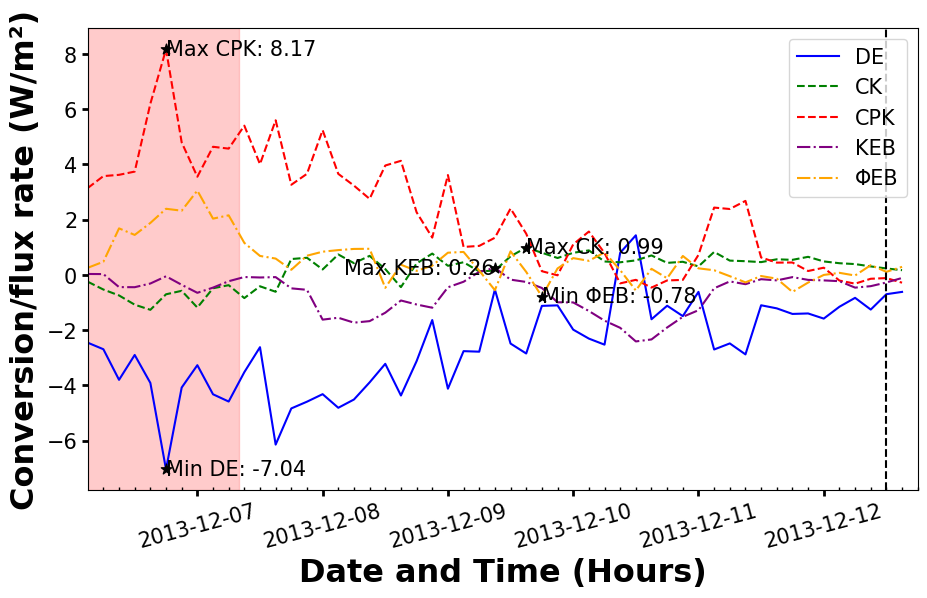

In [5]:
#For running the code for different cyclones ,
#you need to change the storm location, name of cyclone in dataset,and start_date and end_date in the code
#For shading the ri period you need to change the ri_start_date and ri_end_date
import netCDF4 as nc
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib.ticker import AutoMinorLocator

path = '/DISK-0/gokul/ENGY/'
storm = 'data/madi_3_q/'

# Open the NetCDF file
dataset = nc.Dataset(path+storm+'madi_3_q.nc', 'r')

# Extract Time Data
time = dataset.variables['time']
print(f"time steps {time}")
print(f"No.of timesteps {len(time)}")
time_units = dataset.variables['time'].units
calendar = time.calendar if hasattr(time, 'calendar') else 'standard'
# Convert time values to datetime objects
base_time = datetime(2013,12,6,3)
date_values = [base_time + timedelta(hours=float(t)) for t in time]


print(date_values)
print(f"Base time {base_time}")

# Read Data from .txt File
with open(path+storm+'/diss.txt', 'r') as file:
    txt_data1 = [val * -1 for val in[float(line.strip()) for line in file.readlines()]]
with open(path+storm+'/cksum.txt', 'r') as file:
    txt_data2 = [float(line.strip()) for line in file.readlines()]
with open(path+storm+'/eape2eke.txt', 'r') as file:
    txt_data3 = [float(line.strip()) for line in file.readlines()]
with open(path+storm+'/kebsum.txt', 'r') as file:
    txt_data4 = [float(line.strip()) for line in file.readlines()]
with open(path+storm+'/epebsum.txt', 'r') as file:
    txt_data5 = [float(line.strip()) for line in file.readlines()]

# Assuming date_values contains datetime objects
start_date = datetime(2013,12,6,3)
end_date = datetime(2013,12,12,18)

ri_start_date =datetime(2013,12,6,3)
ri_end_date = datetime(2013,12,7,8)
# landfall_date is the datetime object representing the landfall time
landfall_date = datetime(2013,12,12,12)


# Find the indices corresponding to start_date and end_date
start_index = date_values.index(start_date)
end_index = date_values.index(end_date)


# Plot the variables
plt.figure(figsize=(10,6))  # Adjust the figure size as needed
plt.xlim(start_date, end_date)
# Add a shaded region
plt.axvspan(ri_start_date, ri_end_date, alpha= 0.5, color='#FF9999')  # Adjust color and alpha as needed
# Increase x and y-axis tick label sizes
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Create the Plot
# Plot variable1 with blue color and solid line
plt.plot(date_values[start_index:end_index], txt_data1[start_index:end_index], label='DE', color='blue', linestyle='-')
# Plot variable2 with green color and dashed line
plt.plot(date_values[start_index:end_index], txt_data2[start_index:end_index], label='CK', color='green', linestyle='--')
# Plot variable3 with red color and dotted line
plt.plot(date_values[start_index:end_index], txt_data3[start_index:end_index], label='CPK', color='red', linestyle='--')
# Plot variable4 with purple color and dash-dot line
plt.plot(date_values[start_index:end_index], txt_data4[start_index:end_index], label='KEB', color='purple', linestyle='-.')
# Plot variable5 with orange color and dash-star line
plt.plot(date_values[start_index:end_index], txt_data5[start_index:end_index], label='ΦEB', color='orange', linestyle='-.')

# Add labels and title
plt.xlabel('Date and Time (Hours)', fontdict={'fontsize': 23, 'fontweight': 'bold'})
plt.ylabel('Conversion/flux rate (W/m²)', fontdict={'fontsize': 23, 'fontweight': 'bold'})
# Add legend
plt.legend(prop={'weight':'bold'})
plt.legend(fontsize=15)

# List to store variables and their data
variables = [
    {'data': txt_data1, 'label': 'DE', 'operation': 'min'},
    {'data': txt_data2, 'label': 'CK', 'operation': 'max'},
    {'data': txt_data3, 'label': 'CPK', 'operation': 'max'},
    {'data': txt_data4, 'label': 'KEB', 'operation': 'max'},
    {'data': txt_data5, 'label': 'ΦEB', 'operation': 'min'}
]

# Define a small vertical offset for labels
offset = 0.5


for variable in variables:
  
    if variable['operation'] == 'max':
              max_val = max(variable['data'][start_index:end_index])
              max_idx = variable['data'].index(max_val)

              # Get the date and value for the maximum point
              max_date = date_values[max_idx]
    
              # Plot the maximum value with a star marker
              plt.scatter(max_date, max_val, color='black', marker='*', s=60, zorder=5)

            # Add text label for maximum value with adjusted position
              if variable['label'] == 'KEB':
               plt.text(date_values[max_idx], max_val, f'Max {variable["label"]}: {max_val:.2f}', fontsize=15, ha='right', va='center', color='black')
              else:
               plt.text(date_values[max_idx], max_val, f'Max {variable["label"]}: {max_val:.2f}', fontsize=15, ha='left', va='center', color='black')

    elif variable['operation'] == 'min':
             # Find the minimum value and its index
             min_val = min(variable['data'][start_index:end_index])
             min_idx = variable['data'].index(min_val)
        
             # Plot the minimum value with a star marker
             plt.scatter(date_values[min_idx], min_val, color='black', marker='*', s=60, zorder=5)
        
            # Add text label for minimum value with adjusted position
             if variable['label'] == 'KEB':
              plt.text(date_values[min_idx], min_val, f'Min {variable["label"]}: {min_val:.2f}', fontsize=15, ha='left', va='center', color='black')
             else:
              plt.text(date_values[min_idx], min_val, f'Min {variable["label"]}: {min_val:.2f}', fontsize=15, ha='left', va='center', color='black')



# Add a vertical dashed line at landfall time
plt.axvline(landfall_date, color='black', linestyle='--') 
 # Increase thickness of major ticks
plt.tick_params(axis='x', which='major', width=2,length=4,rotation=15)
plt.tick_params(axis='y', which='major', width=2,length=4)
plt.tick_params(axis='x', which='minor', width=1, length=2, direction='in')
# Set the minor locator to AutoMinorLocator for 8 minor ticks between majors
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(8)) 
#plot.show()
# Adjust Margins
plt.subplots_adjust(left=0.11, right=0.94, top=.95, bottom=0.18)

# Save the plot to a desired location
plt.savefig(path+storm+storm[4:-1]+'_energy_conversion_plot2.png',dpi =300)

# Close the NetCDF file
dataset.close()

In [ ]:
#For running the code for different cyclones ,
#you need to change the storm location, name of cyclone in dataset,and start_date and end_date in the code
#For shading the ri period you need to change the ri_start_date and ri_end_date
import netCDF4 as nc
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib.ticker import AutoMinorLocator

path = '/DISK-0/gokul/ENGY/'
storm = 'data/madi_3_q/'

# Open the NetCDF file
dataset = nc.Dataset(path+storm+'madi_3_q.nc', 'r')

# Extract Time Data
time = dataset.variables['time']
print(f"time steps {time}")
print(f"No.of timesteps {len(time)}")
time_units = dataset.variables['time'].units
calendar = time.calendar if hasattr(time, 'calendar') else 'standard'
# Convert time values to datetime objects
base_time = datetime(2013,12,6,3)
date_values = [base_time + timedelta(hours=float(t)) for t in time]


print(date_values)
print(f"Base time {base_time}")

# Read Data from .txt File
with open(path+storm+'/diss.txt', 'r') as file:
    txt_data1 = [val * -1 for val in[float(line.strip()) for line in file.readlines()]]
with open(path+storm+'/cksum.txt', 'r') as file:
    txt_data2 = [float(line.strip()) for line in file.readlines()]
with open(path+storm+'/eape2eke.txt', 'r') as file:
    txt_data3 = [float(line.strip()) for line in file.readlines()]
with open(path+storm+'/kebsum.txt', 'r') as file:
    txt_data4 = [float(line.strip()) for line in file.readlines()]
with open(path+storm+'/epebsum.txt', 'r') as file:
    txt_data5 = [float(line.strip()) for line in file.readlines()]

# Assuming date_values contains datetime objects
start_date = datetime(2013,12,6,3)
end_date = datetime(2013,12,12,18)

ri_start_date =datetime(2013,12,6,3)
ri_end_date = datetime(2013,12,7,8)
# landfall_date is the datetime object representing the landfall time
landfall_date = datetime(2013,12,12,12)


# Find the indices corresponding to start_date and end_date
start_index = date_values.index(start_date)
end_index = date_values.index(end_date)


# Plot the variables
plt.figure(figsize=(10,6))  # Adjust the figure size as needed
plt.xlim(start_date, end_date)
# Add a shaded region
plt.axvspan(ri_start_date, ri_end_date, alpha= 0.5, color='#FF9999')  # Adjust color and alpha as needed
# Increase x and y-axis tick label sizes
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Create the Plot
# Plot variable1 with blue color and solid line
plt.plot(date_values[start_index:end_index], txt_data1[start_index:end_index], label='DE', color='blue', linestyle='-')
# Plot variable2 with green color and dashed line
plt.plot(date_values[start_index:end_index], txt_data2[start_index:end_index], label='CK', color='green', linestyle='--')
# Plot variable3 with red color and dotted line
plt.plot(date_values[start_index:end_index], txt_data3[start_index:end_index], label='CPK', color='red', linestyle='--')
# Plot variable4 with purple color and dash-dot line
plt.plot(date_values[start_index:end_index], txt_data4[start_index:end_index], label='KEB', color='purple', linestyle='-.')
# Plot variable5 with orange color and dash-star line
plt.plot(date_values[start_index:end_index], txt_data5[start_index:end_index], label='ΦEB', color='orange', linestyle='-.')

# Add labels and title
plt.xlabel('Date and Time (Hours)', fontdict={'fontsize': 23, 'fontweight': 'bold'})
plt.ylabel('Conversion/flux rate (W/m²)', fontdict={'fontsize': 23, 'fontweight': 'bold'})
# Add legend
plt.legend(prop={'weight':'bold'})
plt.legend(fontsize=15)

# List to store variables and their data
variables = [
    {'data': txt_data1, 'label': 'DE', 'operation': 'min'},
    {'data': txt_data2, 'label': 'CK', 'operation': 'max'},
    {'data': txt_data3, 'label': 'CPK', 'operation': 'max'},
    {'data': txt_data4, 'label': 'KEB', 'operation': 'max'},
    {'data': txt_data5, 'label': 'ΦEB', 'operation': 'min'}
]

# Define a small vertical offset for labels
offset = 0.5


for variable in variables:
  
    if variable['operation'] == 'max':
              max_val = max(variable['data'][start_index:end_index])
              max_idx = variable['data'].index(max_val)

              # Get the date and value for the maximum point
              max_date = date_values[max_idx]
    
              # Plot the maximum value with a star marker
              plt.scatter(max_date, max_val, color='black', marker='*', s=60, zorder=5)

            # Add text label for maximum value with adjusted position
              if variable['label'] == 'KEB':
               plt.text(date_values[max_idx], max_val, f'Max {variable["label"]}: {max_val:.2f}', fontsize=15, ha='right', va='center', color='black')
              else:
               plt.text(date_values[max_idx], max_val, f'Max {variable["label"]}: {max_val:.2f}', fontsize=15, ha='left', va='center', color='black')

    elif variable['operation'] == 'min':
             # Find the minimum value and its index
             min_val = min(variable['data'][start_index:end_index])
             min_idx = variable['data'].index(min_val)
        
             # Plot the minimum value with a star marker
             plt.scatter(date_values[min_idx], min_val, color='black', marker='*', s=60, zorder=5)
        
            # Add text label for minimum value with adjusted position
             if variable['label'] == 'KEB':
              plt.text(date_values[min_idx], min_val, f'Min {variable["label"]}: {min_val:.2f}', fontsize=15, ha='left', va='center', color='black')
             else:
              plt.text(date_values[min_idx], min_val, f'Min {variable["label"]}: {min_val:.2f}', fontsize=15, ha='left', va='center', color='black')



# Add a vertical dashed line at landfall time
plt.axvline(landfall_date, color='black', linestyle='--') 
 # Increase thickness of major ticks
plt.tick_params(axis='x', which='major', width=2,length=4,rotation=15)
plt.tick_params(axis='y', which='major', width=2,length=4)
plt.tick_params(axis='x', which='minor', width=1, length=2, direction='in')
# Set the minor locator to AutoMinorLocator for 8 minor ticks between majors
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(8)) 
#plot.show()
# Adjust Margins
plt.subplots_adjust(left=0.11, right=0.94, top=.95, bottom=0.18)

# Save the plot to a desired location
plt.savefig(path+storm+storm[4:-1]+'_energy_conversion_plot2.png',dpi =300)

# Close the NetCDF file
dataset.close()

time steps <class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    standard_name: time
    long_name: time
    axis: T
    units: hours since 1900-01-01
    calendar: gregorian
unlimited dimensions: 
current shape = (45,)
filling on, default _FillValue of -2147483647 used
No.of timesteps 45
[datetime.datetime(2020, 5, 16, 0, 0), datetime.datetime(2020, 5, 16, 3, 0), datetime.datetime(2020, 5, 16, 6, 0), datetime.datetime(2020, 5, 16, 9, 0), datetime.datetime(2020, 5, 16, 12, 0), datetime.datetime(2020, 5, 16, 15, 0), datetime.datetime(2020, 5, 16, 18, 0), datetime.datetime(2020, 5, 16, 21, 0), datetime.datetime(2020, 5, 17, 0, 0), datetime.datetime(2020, 5, 17, 3, 0), datetime.datetime(2020, 5, 17, 6, 0), datetime.datetime(2020, 5, 17, 9, 0), datetime.datetime(2020, 5, 17, 12, 0), datetime.datetime(2020, 5, 17, 15, 0), datetime.datetime(2020, 5, 17, 18, 0), datetime.datetime(2020, 5, 17, 21, 0), datetime.datetime(2020, 5, 18, 0, 0), datetime.datetime(2020, 5, 18, 3, 0), datetime.datet

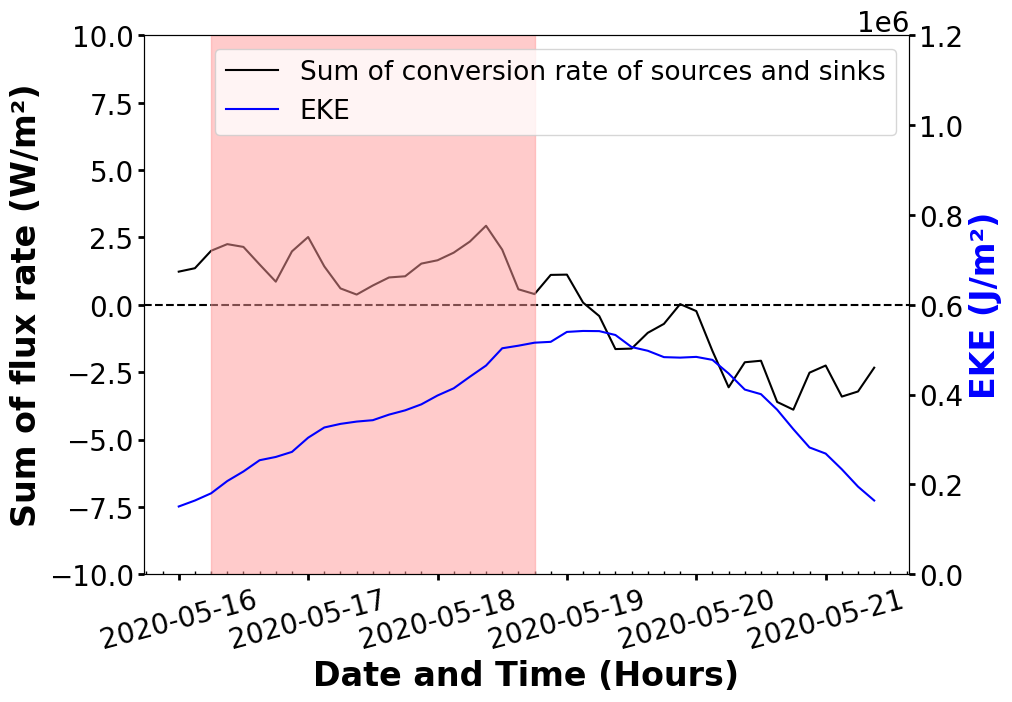

In [155]:
#For running the code for different cyclones ,
#you need to change the storm location, name of cyclone in dataset,and start_date and end_date in the code
#For shading the ri period you need to change the ri_start_date and ri_end_date
import netCDF4 as nc
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib.ticker import AutoMinorLocator
import numpy as np
import pickle


path = '/DISK-0/gokul/ENGY/'
storm_name='amphan'
storm = 'data/'+storm_name+'_3_e/'


# Open the NetCDF file
dataset = nc.Dataset(path+storm+storm_name+'_3_e.nc', 'r')
# Load cyclone data
dc = np.load("/DISK-0/gokul/ENGY/period.pkl", allow_pickle=True)



# Extract Time Data
time = dataset.variables['time']
print(f"time steps {time}")
print(f"No.of timesteps {len(time)}")
time_units = dataset.variables['time'].units
calendar = time.calendar if hasattr(time, 'calendar') else 'standard'
# Convert time values to datetime objects
base_time = datetime(1900,1,1)
#base_time = dc[storm_name.lower()]["base_time"]
date_values = [base_time + timedelta(hours=float(t)) for t in time]
print(date_values)
print(f"Base time {base_time}")

# Read Data from .txt File
with open(path+storm+'/diss.txt', 'r') as file:
    txt_data1 = [val * -1 for val in[float(line.strip()) for line in file.readlines()]]
with open(path+storm+'/cksum.txt', 'r') as file:
    txt_data2 = [float(line.strip()) for line in file.readlines()]
with open(path+storm+'/eape2eke.txt', 'r') as file:
    txt_data3 = [float(line.strip()) for line in file.readlines()]
with open(path+storm+'/kebsum.txt', 'r') as file:
    txt_data4 = [float(line.strip()) for line in file.readlines()]
with open(path+storm+'/epebsum.txt', 'r') as file:
    txt_data5 = [float(line.strip()) for line in file.readlines()]

# Read Data from .txt File for EKE
with open(path+storm+'/eke.txt', 'r') as file:
    txt_data_eke = [float(line.strip()) for line in file.readlines()]


# Assuming date_values contains datetime objects
start_date = dc[storm_name.lower()]["start_date"]
end_date = dc[storm_name.lower()]["end_date"]
# Extend the end_date by 3 hours
end_date_extended = end_date + timedelta(hours=3)


ri_start_date =dc[storm_name.lower()]["ri_start_date"]
ri_end_date = dc[storm_name.lower()]["ri_end_date"]
# landfall_date is the datetime object representing the landfall time
landfall_date = dc[storm_name.lower()]["landfall_date"]
# Find the indices corresponding to start_date and end_date
start_index = date_values.index(start_date)
end_index = date_values.index(end_date)

# Calculate the sum of all variables for each time step
sum_variables = [sum(val) for val in zip( txt_data1, txt_data2, txt_data3,txt_data4, txt_data5)]

# Create a new figure for the sum plot
plt.figure(figsize=(10,7))  # Adjust the figure size as needed
# Plot the sum of variables with a black color and solid line
plt.plot(date_values[start_index:end_index], sum_variables[start_index:end_index], label='Sum of conversion rate of sources and sinks', color='black', linestyle='-')

# Plot EKE values on the left side of the y-axis
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(date_values[start_index:end_index], txt_data_eke[start_index:end_index], label='EKE', color='blue', linestyle='-')

# Add labels and title

ax1.set_ylabel('Sum of flux rate (W/m²)', fontdict={'fontsize': 24, 'fontweight': 'bold'})
ax2.set_ylabel('EKE (J/m²)', fontdict={'fontsize': 24, 'fontweight': 'bold','color':"blue"})
ax1.set_xlabel('Date and Time (Hours)', fontdict={'fontsize': 24, 'fontweight': 'bold'})  # Adjust fontsize if needed

plt.axvspan(ri_start_date, ri_end_date, alpha= 0.5, color='#FF9999')  # Adjust color and alpha as needed
# Add legend
plt.legend()
# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

# Combine the lines and labels
combined_lines = lines1 + lines2
combined_labels = labels1 + labels2

# Create the combined legend
plt.legend(combined_lines, combined_labels, loc=0, fontsize=19)  # Adjust the fontsize as needed for the combined legend

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.rc('font', size=20)
# Access the y-axis tick labels
y_formatter = plt.gca().get_yaxis().get_major_formatter()
# Adjust the global font size of the plot (including exponent part)

# Set the minor locator to AutoMinorLocator for 8 minor ticks between majors
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(8))
ax1.tick_params(axis='x', which='major', width=2, length=4,labelsize=20,rotation=15)
ax1.tick_params(axis='x', which='minor', width=1, length=2, direction='in')  # You can adjust the width and length for the minor ticks too
ax1.tick_params(axis='y', labelsize=20)  # Adjust the labelsize as needed for the y-axis ticks
ax2.tick_params(axis='y', labelsize=20)
ax1.tick_params(axis='y', which='major', width=2,length=4)
ax2.tick_params(axis='y', which='major', width=2,length=4)

ax1.axhline(y=0, color='black', linestyle='--')
#plt.tight_layout()
# Set y-axis limits for both plots
ax1.set_ylim(-10, 10)  # Adjust the upper limit as needed
ax2.set_ylim(0, 1.2e6)  # Adjust the upper limit as needed
# Adjust Margins
plt.subplots_adjust(left=0.135, right=0.9, top=.95, bottom=0.18)

# Save the plot to a desired location
plt.savefig(path+storm+storm[4:-1]+'_sum_of_variables_plot.png', dpi=300)

# Show the plot
plt.show()


time steps <class 'netCDF4._netCDF4.Variable'>
int64 time(time)
    standard_name: time
    long_name: time
    axis: T
    units: hours since 2013-11-19 00:00:00
    calendar: proleptic_gregorian
unlimited dimensions: 
current shape = (31,)
filling on, default _FillValue of -9223372036854775806 used
No.of timesteps 31
[datetime.datetime(2013, 11, 19, 0, 0), datetime.datetime(2013, 11, 19, 3, 0), datetime.datetime(2013, 11, 19, 6, 0), datetime.datetime(2013, 11, 19, 9, 0), datetime.datetime(2013, 11, 19, 12, 0), datetime.datetime(2013, 11, 19, 15, 0), datetime.datetime(2013, 11, 19, 18, 0), datetime.datetime(2013, 11, 19, 21, 0), datetime.datetime(2013, 11, 20, 0, 0), datetime.datetime(2013, 11, 20, 3, 0), datetime.datetime(2013, 11, 20, 6, 0), datetime.datetime(2013, 11, 20, 9, 0), datetime.datetime(2013, 11, 20, 12, 0), datetime.datetime(2013, 11, 20, 15, 0), datetime.datetime(2013, 11, 20, 18, 0), datetime.datetime(2013, 11, 20, 21, 0), datetime.datetime(2013, 11, 21, 0, 0), datetim

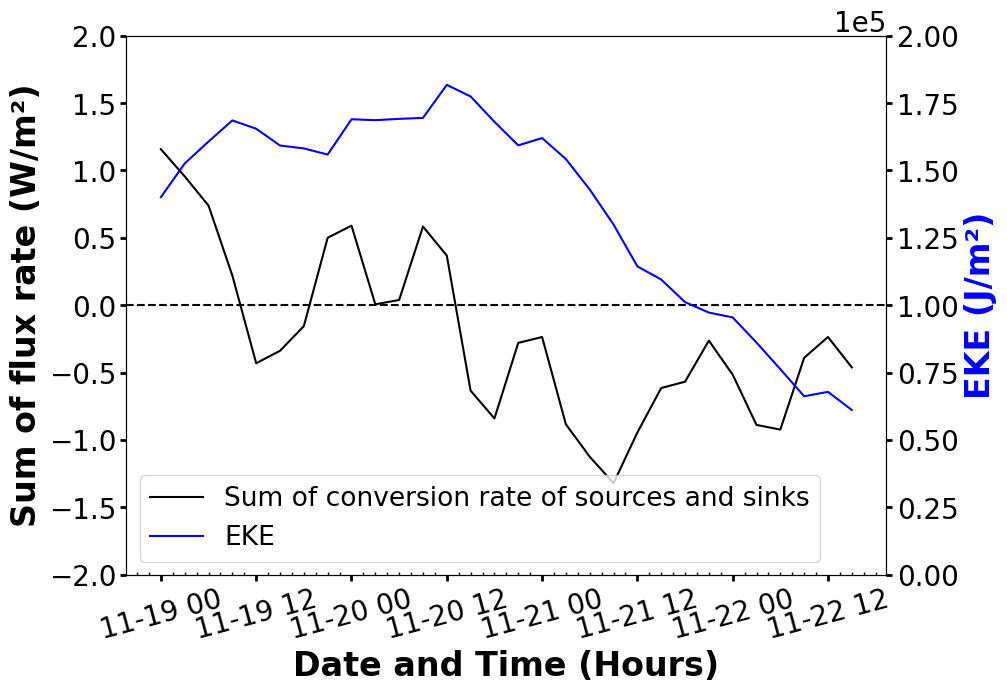

In [153]:
path = '/DISK-0/gokul/ENGY/'
storm_name='helen'
storm = 'dat2/'+storm_name+'_3_q/'


# Open the NetCDF file
dataset = nc.Dataset(path+storm+storm_name+'_3_q.nc', 'r')
# Load cyclone data
dc = np.load("/DISK-0/gokul/ENGY/period_nri.pkl", allow_pickle=True)



# Extract Time Data
time = dataset.variables['time']
print(f"time steps {time}")
print(f"No.of timesteps {len(time)}")
time_units = dataset.variables['time'].units
calendar = time.calendar if hasattr(time, 'calendar') else 'standard'
# Convert time values to datetime objects
#base_time = datetime(1900,1,1)
base_time = dc[storm_name.lower()]["base_time"]
date_values = [base_time + timedelta(hours=float(t)) for t in time]
print(date_values)
print(f"Base time {base_time}")

# Read Data from .txt File
with open(path+storm+'/diss.txt', 'r') as file:
    txt_data1 = [val * -1 for val in[float(line.strip()) for line in file.readlines()]]
with open(path+storm+'/cksum.txt', 'r') as file:
    txt_data2 = [float(line.strip()) for line in file.readlines()]
with open(path+storm+'/eape2eke.txt', 'r') as file:
    txt_data3 = [float(line.strip()) for line in file.readlines()]
with open(path+storm+'/kebsum.txt', 'r') as file:
    txt_data4 = [float(line.strip()) for line in file.readlines()]
with open(path+storm+'/epebsum.txt', 'r') as file:
    txt_data5 = [float(line.strip()) for line in file.readlines()]

# Read Data from .txt File for EKE
with open(path+storm+'/eke.txt', 'r') as file:
    txt_data_eke = [float(line.strip()) for line in file.readlines()]


# Assuming date_values contains datetime objects
start_date = dc[storm_name.lower()]["start_date"]
end_date = dc[storm_name.lower()]["end_date"]
# Extend the end_date by 3 hours
end_date_extended = end_date + timedelta(hours=3)


#ri_start_date =dc[storm_name.lower()]["ri_start_date"]
#ri_end_date = dc[storm_name.lower()]["ri_end_date"]
# landfall_date is the datetime object representing the landfall time
landfall_date = dc[storm_name.lower()]["landfall_date"]
# Find the indices corresponding to start_date and end_date
start_index = date_values.index(start_date)
end_index = date_values.index(end_date)

# Calculate the sum of all variables for each time step
sum_variables = [sum(val) for val in zip( txt_data1, txt_data2, txt_data3,txt_data4, txt_data5)]

# Create a new figure for the sum plot
plt.figure(figsize=(10,7))  # Adjust the figure size as needed
# Plot the sum of variables with a black color and solid line
plt.plot(date_values[start_index:end_index], sum_variables[start_index:end_index], label='Sum of conversion rate of sources and sinks', color='black', linestyle='-')

# Plot EKE values on the left side of the y-axis
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(date_values[start_index:end_index], txt_data_eke[start_index:end_index], label='EKE', color='blue', linestyle='-')

# Add labels and title

ax1.set_ylabel('Sum of flux rate (W/m²)', fontdict={'fontsize': 24, 'fontweight': 'bold'})
ax2.set_ylabel('EKE (J/m²)', fontdict={'fontsize': 24, 'fontweight': 'bold', 'color': 'blue'})
ax1.set_xlabel('Date and Time (Hours)', fontdict={'fontsize': 24, 'fontweight': 'bold'})  # Adjust fontsize if needed

#plt.axvspan(ri_start_date, ri_end_date, alpha= 0.5, color='#FF9999')  # Adjust color and alpha as needed
# Add legend
plt.legend()
# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

# Combine the lines and labels
combined_lines = lines1 + lines2
combined_labels = labels1 + labels2

# Create the combined legend
plt.legend(combined_lines, combined_labels, loc=0, fontsize=19)  # Adjust the fontsize as needed for the combined legend

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# Access the y-axis tick labels
y_formatter = plt.gca().get_yaxis().get_major_formatter()
# Adjust the global font size of the plot (including exponent part)
plt.rc('font', size=20)
# Set the minor locator to AutoMinorLocator for 8 minor ticks between majors
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(8))
ax1.tick_params(axis='x', which='major', width=2, length=4,labelsize=20,rotation=15)
ax1.tick_params(axis='x', which='minor', width=1, length=2, direction='in')  # You can adjust the width and length for the minor ticks too
ax1.tick_params(axis='y', labelsize=20)  # Adjust the labelsize as needed for the y-axis ticks
ax2.tick_params(axis='y', labelsize=20)
ax1.tick_params(axis='y', which='major', width=2,length=4)
ax2.tick_params(axis='y', which='major', width=2,length=4)
ax1.axhline(y=0, color='black', linestyle='--')
#plt.tight_layout()
# Adjust Margins
ax1.set_ylim(-2, 2)  # Adjust the upper limit as needed
ax2.set_ylim(0, 0.2e6)  # Adjust the upper limit as needed
plt.subplots_adjust(left=0.12, right=0.88, top=.95, bottom=0.18)
# Save the plot to a desired location
plt.savefig(path+storm+storm[4:-1]+'_sum_of_variables_plot.png', dpi=300)

# Show the plot
plt.show()


time steps <class 'netCDF4._netCDF4.Variable'>
int64 time(time)
    standard_name: time
    long_name: time
    axis: T
    units: hours since 2013-10-08 03:00:00
    calendar: proleptic_gregorian
unlimited dimensions: 
current shape = (50,)
filling on, default _FillValue of -9223372036854775806 used
No.of timesteps 50
[datetime.datetime(2013, 10, 8, 3, 0), datetime.datetime(2013, 10, 8, 6, 0), datetime.datetime(2013, 10, 8, 9, 0), datetime.datetime(2013, 10, 8, 12, 0), datetime.datetime(2013, 10, 8, 15, 0), datetime.datetime(2013, 10, 8, 18, 0), datetime.datetime(2013, 10, 8, 21, 0), datetime.datetime(2013, 10, 9, 0, 0), datetime.datetime(2013, 10, 9, 3, 0), datetime.datetime(2013, 10, 9, 6, 0), datetime.datetime(2013, 10, 9, 9, 0), datetime.datetime(2013, 10, 9, 12, 0), datetime.datetime(2013, 10, 9, 15, 0), datetime.datetime(2013, 10, 9, 18, 0), datetime.datetime(2013, 10, 9, 21, 0), datetime.datetime(2013, 10, 10, 0, 0), datetime.datetime(2013, 10, 10, 3, 0), datetime.datetime(2013

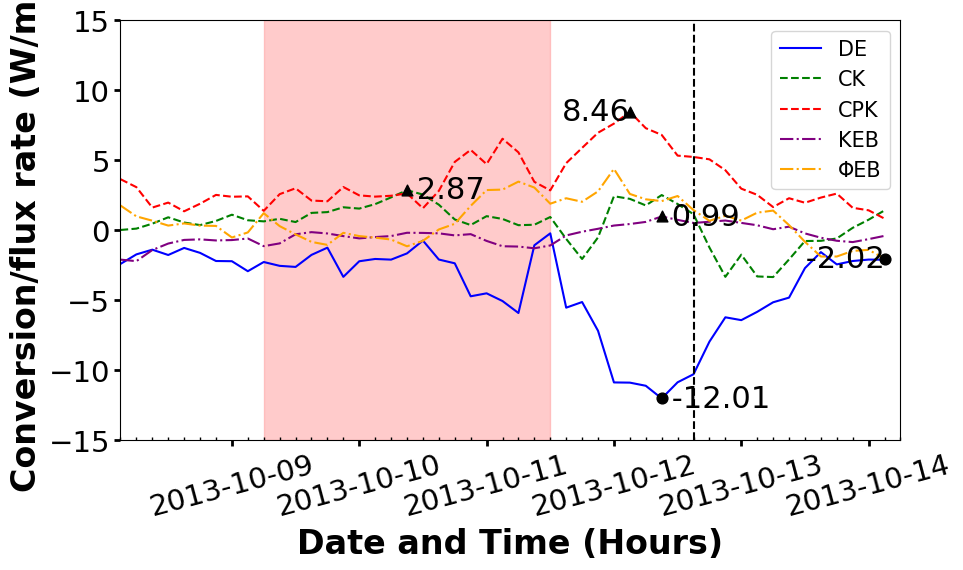

In [162]:
import numpy as np
import pickle
import netCDF4 as nc
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib.ticker import AutoMinorLocator
import matplotlib.ticker as ticker

path = '/DISK-0/gokul/ENGY/'
storm_name='phailin'
storm = 'data/'+storm_name+'_3_q/'


# Open the NetCDF file
dataset = nc.Dataset(path+storm+storm_name+'_3_q.nc', 'r')
# Load cyclone data
dc = np.load("/DISK-0/gokul/ENGY/period.pkl", allow_pickle=True)


# Extract Time Data
time = dataset.variables['time']
print(f"time steps {time}")
print(f"No.of timesteps {len(time)}")
time_units = dataset.variables['time'].units
calendar = time.calendar if hasattr(time, 'calendar') else 'standard'
#base_time=datetime(1900,1,1)
base_time = dc[storm_name.lower()]["base_time"]
date_values = [base_time + timedelta(hours=float(t)) for t in time]


print(date_values)
print(f"Base time {base_time}")

# Read Data from .txt File
with open(path+storm+'/diss.txt', 'r') as file:
    txt_data1 = [val * -1 for val in[float(line.strip()) for line in file.readlines()]]
with open(path+storm+'/cksum.txt', 'r') as file:
    txt_data2 = [float(line.strip()) for line in file.readlines()]
with open(path+storm+'/eape2eke.txt', 'r') as file:
    txt_data3 = [float(line.strip()) for line in file.readlines()]
with open(path+storm+'/kebsum.txt', 'r') as file:
    txt_data4 = [float(line.strip()) for line in file.readlines()]
with open(path+storm+'/epebsum.txt', 'r') as file:
    txt_data5 = [float(line.strip()) for line in file.readlines()]

# Assuming date_values contains datetime objects
start_date = dc[storm_name.lower()]["start_date"]
end_date = dc[storm_name.lower()]["end_date"]

ri_start_date =dc[storm_name.lower()]["ri_start_date"]
ri_end_date = dc[storm_name.lower()]["ri_end_date"]
# landfall_date is the datetime object representing the landfall time
landfall_date = dc[storm_name.lower()]["landfall_date"]


# Find the indices corresponding to start_date and end_date
start_index = date_values.index(start_date)
end_index = date_values.index(end_date)


# Plot the variables
plt.figure(figsize=(10,6))  # Adjust the figure size as needed
plt.xlim(start_date, end_date)
# Add a shaded region
plt.axvspan(ri_start_date, ri_end_date, alpha= 0.5, color='#FF9999')  # Adjust color and alpha as needed
# Increase x and y-axis tick label sizes
plt.xticks(fontsize=21)
plt.yticks(fontsize=21)

# Create the Plot
# Plot variable1 with blue color and solid line
plt.plot(date_values[start_index:end_index], txt_data1[start_index:end_index], label='DE', color='blue', linestyle='-')
# Plot variable2 with green color and dashed line
plt.plot(date_values[start_index:end_index], txt_data2[start_index:end_index], label='CK', color='green', linestyle='--')
# Plot variable3 with red color and dotted line
plt.plot(date_values[start_index:end_index], txt_data3[start_index:end_index], label='CPK', color='red', linestyle='--')
# Plot variable4 with purple color and dash-dot line
plt.plot(date_values[start_index:end_index], txt_data4[start_index:end_index], label='KEB', color='purple', linestyle='-.')
# Plot variable5 with orange color and dash-star line
plt.plot(date_values[start_index:end_index], txt_data5[start_index:end_index], label='ΦEB', color='orange', linestyle='-.')

# Add labels and title
plt.xlabel('Date and Time (Hours)', fontdict={'fontsize': 24, 'fontweight': 'bold'})
plt.ylabel('Conversion/flux rate (W/m²)', fontdict={'fontsize': 24, 'fontweight': 'bold'})
# Add legend
plt.legend(prop={'weight':'extra bold'})
plt.legend(fontsize=15)

# List to store variables and their data
variables = [
    {'data': txt_data1, 'label': 'DE', 'operation': 'min'},
    {'data': txt_data2, 'label': 'CK', 'operation': 'max'},
    {'data': txt_data3, 'label': 'CPK', 'operation': 'max'},
    {'data': txt_data4, 'label': 'KEB', 'operation': 'max'},
    {'data': txt_data5, 'label': 'ΦEB', 'operation': 'min'}
]

# Define a small vertical offset for labels
offset = 0.5


for variable in variables:
  
    if variable['operation'] == 'max':
              max_val = max(variable['data'][start_index:end_index])
              max_idx = variable['data'].index(max_val)

              # Get the date and value for the maximum point
              max_date = date_values[max_idx]
    
              # Plot the maximum value with a star marker
              plt.scatter(max_date, max_val, color='black', marker='^', s=60, zorder=5)

            # Add text label for maximum value with adjusted position
              if variable['label'] == 'CPK':
               plt.text(date_values[max_idx], max_val, f'{max_val:.2f}', fontsize=22, ha='right', va='center', color='black')
              else:
               plt.text(date_values[max_idx], max_val, f' {max_val:.2f}', fontsize=22, ha='left', va='center', color='black')

    elif variable['operation'] == 'min':
             # Find the minimum value and its index
             min_val = min(variable['data'][start_index:end_index])
             min_idx = variable['data'].index(min_val)
        
             # Plot the minimum value with a star marker
             plt.scatter(date_values[min_idx], min_val, color='black', marker='o', s=60, zorder=5)
        
            # Add text label for minimum value with adjusted position
             if variable['label'] == 'ΦEB':
              plt.text(date_values[min_idx], min_val, f' {min_val:.2f}', fontsize=22, ha='right', va='center', color='black')
             else:
              plt.text(date_values[min_idx], min_val, f' {min_val:.2f}', fontsize=22, ha='left', va='center', color='black')



# Add a vertical dashed line at landfall time
plt.axvline(landfall_date, color='black', linestyle='--') 
 # Increase thickness of major ticks
plt.tick_params(axis='x', which='major', width=2,length=4,rotation=15)
plt.tick_params(axis='y', which='major', width=2,length=4)
plt.tick_params(axis='x', which='minor', width=1, length=2, direction='in')
# Set the minor locator to AutoMinorLocator for 8 minor ticks between majors
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(8))
plt.ylim(-15,15) 
#plot.show()
# Adjust Margins
plt.subplots_adjust(left=0.16, right=0.94, top=.9, bottom=0.2)

# Save the plot to a desired location
plt.savefig(path+storm+storm[4:-1]+'_energy_conversion_plot2.png',dpi =300)

# Close the NetCDF file
dataset.close()

time steps <class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    standard_name: time
    long_name: time
    axis: T
    units: hours since 1900-01-01
    calendar: gregorian
unlimited dimensions: 
current shape = (31,)
filling on, default _FillValue of -2147483647 used
No.of timesteps 31
[datetime.datetime(2022, 12, 6, 12, 0), datetime.datetime(2022, 12, 6, 15, 0), datetime.datetime(2022, 12, 6, 18, 0), datetime.datetime(2022, 12, 6, 21, 0), datetime.datetime(2022, 12, 7, 0, 0), datetime.datetime(2022, 12, 7, 3, 0), datetime.datetime(2022, 12, 7, 6, 0), datetime.datetime(2022, 12, 7, 9, 0), datetime.datetime(2022, 12, 7, 12, 0), datetime.datetime(2022, 12, 7, 15, 0), datetime.datetime(2022, 12, 7, 18, 0), datetime.datetime(2022, 12, 7, 21, 0), datetime.datetime(2022, 12, 8, 0, 0), datetime.datetime(2022, 12, 8, 3, 0), datetime.datetime(2022, 12, 8, 6, 0), datetime.datetime(2022, 12, 8, 9, 0), datetime.datetime(2022, 12, 8, 12, 0), datetime.datetime(2022, 12, 8, 15, 0), datetime.dat

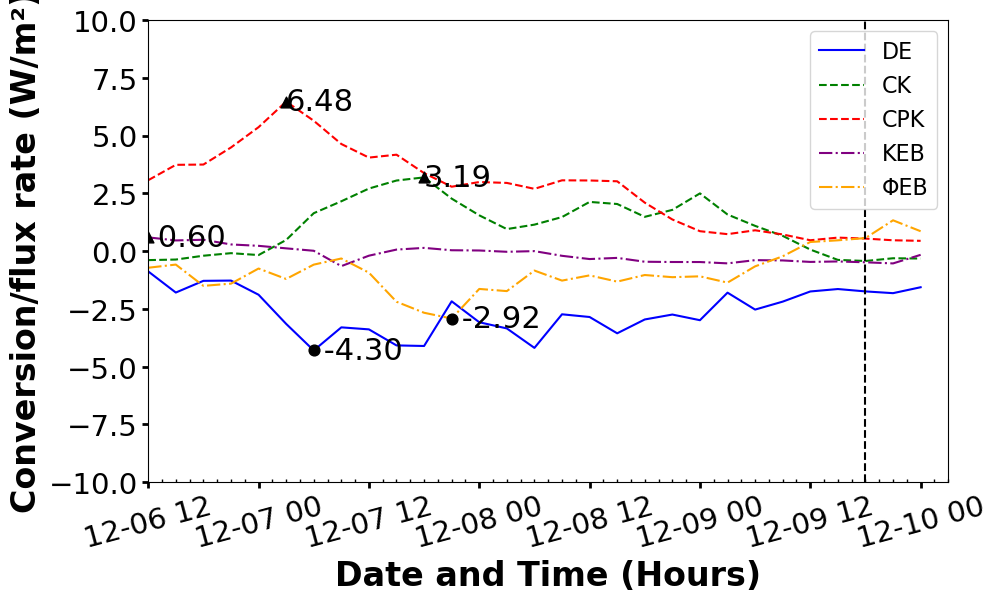

In [123]:
import pickle
import netCDF4 as nc
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib.ticker import AutoMinorLocator
import matplotlib.ticker as ticker

path = '/DISK-0/gokul/ENGY/'
storm_name='mandous'
storm = 'dat2/'+storm_name+'_3_e/'


# Open the NetCDF file
dataset = nc.Dataset(path+storm+storm_name+'_3_e.nc', 'r')
# Load cyclone data
dc = np.load("/DISK-0/gokul/ENGY/period_nri.pkl", allow_pickle=True)


# Extract Time Data
time = dataset.variables['time']
print(f"time steps {time}")
print(f"No.of timesteps {len(time)}")
time_units = dataset.variables['time'].units
calendar = time.calendar if hasattr(time, 'calendar') else 'standard'
base_time=datetime(1900,1,1)
#base_time = dc[storm_name.lower()]["base_time"]
date_values = [base_time + timedelta(hours=float(t)) for t in time]


print(date_values)
print(f"Base time {base_time}")

# Read Data from .txt File
with open(path+storm+'/diss.txt', 'r') as file:
    txt_data1 = [val * -1 for val in[float(line.strip()) for line in file.readlines()]]
with open(path+storm+'/cksum.txt', 'r') as file:
    txt_data2 = [float(line.strip()) for line in file.readlines()]
with open(path+storm+'/eape2eke.txt', 'r') as file:
    txt_data3 = [float(line.strip()) for line in file.readlines()]
with open(path+storm+'/kebsum.txt', 'r') as file:
    txt_data4 = [float(line.strip()) for line in file.readlines()]
with open(path+storm+'/epebsum.txt', 'r') as file:
    txt_data5 = [float(line.strip()) for line in file.readlines()]

# Assuming date_values contains datetime objects
start_date = dc[storm_name.lower()]["start_date"]
end_date = dc[storm_name.lower()]["end_date"]

#ri_start_date =dc[storm_name.lower()]["ri_start_date"]
#ri_end_date = dc[storm_name.lower()]["ri_end_date"]
# landfall_date is the datetime object representing the landfall time
landfall_date = dc[storm_name.lower()]["landfall_date"]


# Find the indices corresponding to start_date and end_date
start_index = date_values.index(start_date)
end_index = date_values.index(end_date)


# Plot the variables
plt.figure(figsize=(10,6))  # Adjust the figure size as needed
plt.xlim(start_date, end_date)
# Add a shaded region
#plt.axvspan(ri_start_date, ri_end_date, alpha= 0.5, color='#FF9999')  # Adjust color and alpha as needed
# Increase x and y-axis tick label sizes
plt.xticks(fontsize=21)
plt.yticks(fontsize=21)

# Create the Plot
# Plot variable1 with blue color and solid line
plt.plot(date_values[start_index:end_index], txt_data1[start_index:end_index], label='DE', color='blue', linestyle='-')
# Plot variable2 with green color and dashed line
plt.plot(date_values[start_index:end_index], txt_data2[start_index:end_index], label='CK', color='green', linestyle='--')
# Plot variable3 with red color and dotted line
plt.plot(date_values[start_index:end_index], txt_data3[start_index:end_index], label='CPK', color='red', linestyle='--')
# Plot variable4 with purple color and dash-dot line
plt.plot(date_values[start_index:end_index], txt_data4[start_index:end_index], label='KEB', color='purple', linestyle='-.')
# Plot variable5 with orange color and dash-star line
plt.plot(date_values[start_index:end_index], txt_data5[start_index:end_index], label='ΦEB', color='orange', linestyle='-.')

# Add labels and title
plt.xlabel('Date and Time (Hours)', fontdict={'fontsize': 24, 'fontweight': 'bold'})
plt.ylabel('Conversion/flux rate (W/m²)', fontdict={'fontsize': 24, 'fontweight': 'bold'})
# Add legend
plt.legend(prop={'weight':'extra bold'})
plt.legend(fontsize=16)

# List to store variables and their data
variables = [
    {'data': txt_data1, 'label': 'DE', 'operation': 'min'},
    {'data': txt_data2, 'label': 'CK', 'operation': 'max'},
    {'data': txt_data3, 'label': 'CPK', 'operation': 'max'},
    {'data': txt_data4, 'label': 'KEB', 'operation': 'max'},
    {'data': txt_data5, 'label': 'ΦEB', 'operation': 'min'}
]

# Define a small vertical offset for labels
offset = 0.5


for variable in variables:
  
    if variable['operation'] == 'max':
              max_val = max(variable['data'][start_index:end_index])
              max_idx = variable['data'].index(max_val)

              # Get the date and value for the maximum point
              max_date = date_values[max_idx]
    
              # Plot the maximum value with a star marker
              plt.scatter(max_date, max_val, color='black', marker='^', s=60, zorder=5)

            # Add text label for maximum value with adjusted position
              if variable['label'] == 'KEB':
               plt.text(date_values[max_idx], max_val, f' {max_val:.2f}', fontsize=22, ha='left', va='center', color='black')
              else:
               plt.text(date_values[max_idx], max_val, f'{max_val:.2f}', fontsize=22, ha='left', va='center', color='black')

    elif variable['operation'] == 'min':
             # Find the minimum value and its index
             min_val = min(variable['data'][start_index:end_index])
             min_idx = variable['data'].index(min_val)
        
             # Plot the minimum value with a star marker
             plt.scatter(date_values[min_idx], min_val, color='black', marker='o', s=60, zorder=5)
        
            # Add text label for minimum value with adjusted position
             if variable['label'] == 'KEB':
              plt.text(date_values[min_idx], min_val, f' {min_val:.2f}', fontsize=22, ha='left', va='center', color='black')
             else:
              plt.text(date_values[min_idx], min_val, f' {min_val:.2f}', fontsize=22, ha='left', va='center', color='black')



# Add a vertical dashed line at landfall time
plt.axvline(landfall_date, color='black', linestyle='--') 
 # Increase thickness of major ticks
plt.tick_params(axis='x', which='major', width=2,length=4,rotation=15)
plt.tick_params(axis='y', which='major', width=2,length=4)
plt.tick_params(axis='x', which='minor', width=1, length=2, direction='in')
# Set the minor locator to AutoMinorLocator for 8 minor ticks between majors
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(8)) 
plt.ylim(-10,10)
# Adjust Margins
plt.subplots_adjust(left=0.14, right=0.94, top=.95, bottom=0.18)

# Save the plot to a desired location
plt.savefig(path+storm+storm[4:-1]+'_energy_conversion_plot2.png',dpi =300)
plt.show()
# Close the NetCDF file
dataset.close()